# Unload the Tarfile

In [1]:
import tarfile

In [2]:
tf = tarfile.open('c:/Users/nishant/DCGAN/cartoonset10k.tgz')

In [5]:
tf.extractall('c:/Users/nishant/DCGAN/content/')

# DCGAN

In [1]:
from keras.layers import *
from keras.models import Sequential,Model
from keras.optimizers import Adam
from keras.layers.advanced_activations import LeakyReLU
import matplotlib.pyplot as plt
import numpy as np
import math
from keras.preprocessing import image
import os
from tqdm import tqdm

In [2]:
train_dataset = []

In [3]:
for file in tqdm(os.listdir('c:/Users/nishant/DCGAN/content/cartoonset10k/')):
    if(file[-4:]=='.png') :
        img = image.load_img(os.path.join('c:/Users/nishant/DCGAN/content/cartoonset10k',file),target_size=(100,100))
        img = image.img_to_array(img)
        img = (img.astype('float32') - 127.5)/127.5
        train_dataset.append(img)

100%|██████████| 20000/20000 [00:40<00:00, 492.14it/s]


In [4]:
len(train_dataset)

10000

In [5]:
train_dataset[0].shape

(100, 100, 3)

In [6]:
x_train  = np.array(train_dataset)

In [7]:
x_train.shape

(10000, 100, 100, 3)

In [8]:
NUM_EPOCHS = 50
BATCH_SIZE = 256
NO_OF_BATCHES = math.ceil(x_train.shape[0]/float(BATCH_SIZE))
HALF_BATCH_SIZE = int(BATCH_SIZE/2)
NOISE_DIM = 100

adam = Adam(lr=2e-4,beta_1 = 0.5)

In [9]:
generator = Sequential()
generator.add(Dense(25*25*128,input_shape=(NOISE_DIM,)))
generator.add(Reshape((25,25,128)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(64,kernel_size=(3,3),strides=(2,2),padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(3,kernel_size=(5,5),strides=(2,2),padding='same',activation='tanh'))

generator.compile(loss='binary_crossentropy',optimizer=adam)
generator.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80000)             8080000   
_________________________________________________________________
reshape (Reshape)            (None, 25, 25, 128)       0         
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 25, 25, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 25, 25, 128)       512       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 50, 50, 64)        73792     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 50, 50, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 64)        2

In [10]:
discriminator = Sequential()
discriminator.add(Conv2D(64,(5,5),strides=(2,2),padding='same',input_shape=(100,100,3)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Conv2D(128,(5,5),strides=(2,2),padding='same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Flatten())
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 64)        4864      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 128)       204928    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 25, 25, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 80000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 80001     
Total params: 289,793
Trainable params: 289,793
Non-trainable params: 0
________________________________________________

In [11]:
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)


model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)


In [12]:
def save_imgs(epoch,samples=100):
    noise = np.random.normal(0,1,size=(samples,NOISE_DIM))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples,100,100,3)
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('c:/Users/nishant/DCGAN/images/gan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()

Epoch 1 D loss: 12.750494 G loss: 4.874415
Epoch 2 D loss: 6.855239 G loss: 0.456382
Epoch 3 D loss: 6.774703 G loss: 0.230665
Epoch 4 D loss: 6.690969 G loss: 0.182813
Epoch 5 D loss: 6.709041 G loss: 0.192771
Epoch 6 D loss: 15.928923 G loss: 13.271165
Epoch 7 D loss: 26.957015 G loss: 139.100195
Epoch 8 D loss: 17.907426 G loss: 126.148093
Epoch 9 D loss: 20.205882 G loss: 100.360628
Epoch 10 D loss: 21.046024 G loss: 85.121331


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

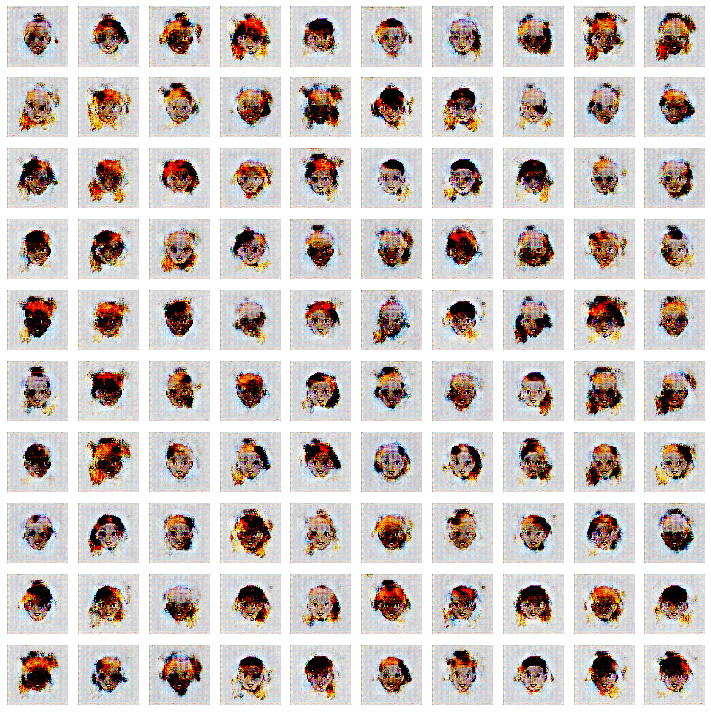

Epoch 11 D loss: 23.424129 G loss: 66.707553
Epoch 12 D loss: 25.264429 G loss: 59.527819
Epoch 13 D loss: 27.146531 G loss: 56.573546
Epoch 14 D loss: 27.704529 G loss: 55.461679
Epoch 15 D loss: 27.427568 G loss: 52.796973
Epoch 16 D loss: 26.714065 G loss: 50.777970
Epoch 17 D loss: 26.314312 G loss: 50.274920
Epoch 18 D loss: 26.140434 G loss: 49.083978
Epoch 19 D loss: 25.909943 G loss: 48.647684
Epoch 20 D loss: 25.909339 G loss: 47.933654


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

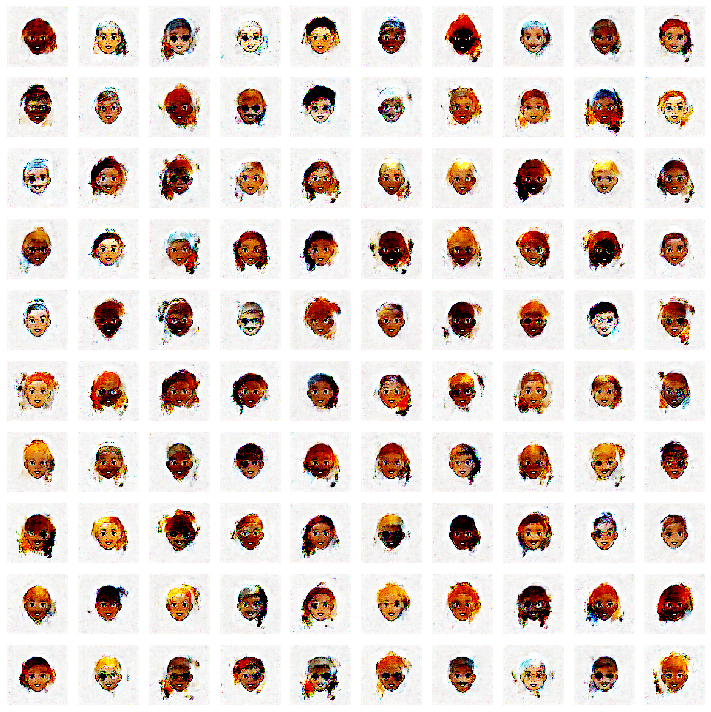

Epoch 21 D loss: 25.815723 G loss: 47.577765
Epoch 22 D loss: 25.708561 G loss: 47.459798
Epoch 23 D loss: 25.657921 G loss: 47.110984
Epoch 24 D loss: 25.529789 G loss: 47.070444
Epoch 25 D loss: 25.424841 G loss: 47.075206
Epoch 26 D loss: 25.297106 G loss: 47.672231
Epoch 27 D loss: 25.110142 G loss: 47.567943
Epoch 28 D loss: 24.901237 G loss: 48.133089
Epoch 29 D loss: 24.881197 G loss: 48.622641
Epoch 30 D loss: 24.596941 G loss: 49.141481


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

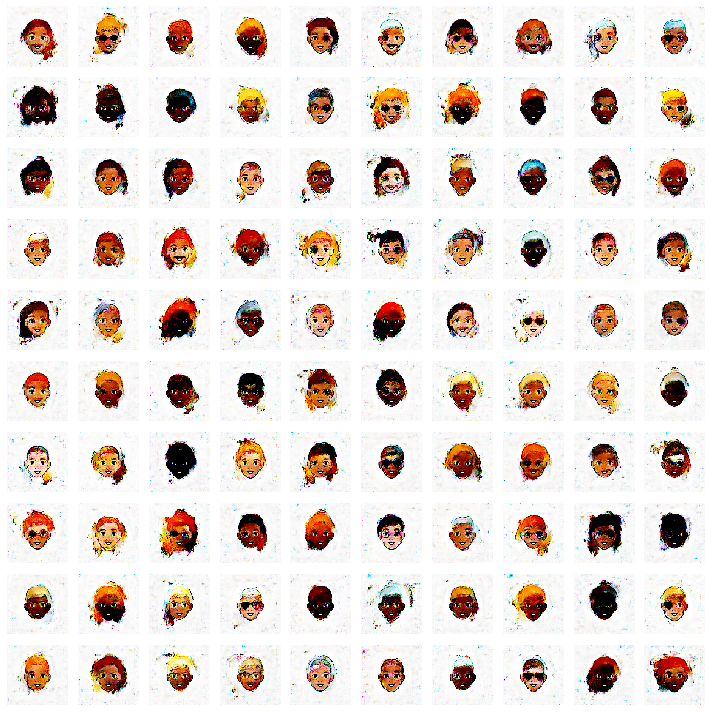

Epoch 31 D loss: 24.306335 G loss: 49.989929
Epoch 32 D loss: 24.098812 G loss: 50.304447
Epoch 33 D loss: 24.059466 G loss: 50.697737
Epoch 34 D loss: 24.287712 G loss: 51.328795
Epoch 35 D loss: 23.957315 G loss: 51.990377
Epoch 36 D loss: 23.491802 G loss: 52.414162
Epoch 37 D loss: 23.291875 G loss: 52.868876
Epoch 38 D loss: 23.458098 G loss: 53.339904
Epoch 39 D loss: 23.441977 G loss: 54.303876
Epoch 40 D loss: 23.182516 G loss: 54.764806


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

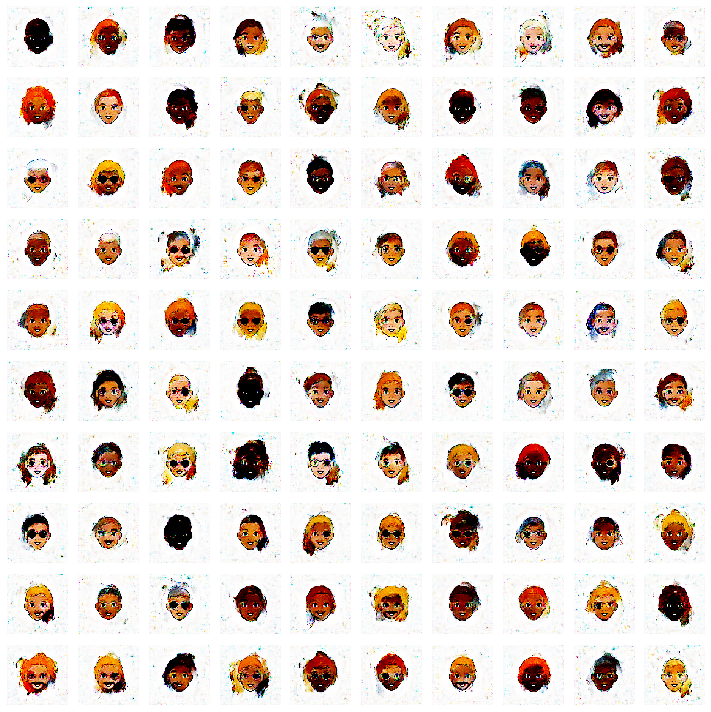

Epoch 41 D loss: 23.145086 G loss: 55.822770
Epoch 42 D loss: 22.732001 G loss: 55.798926
Epoch 43 D loss: 22.567842 G loss: 56.420403
Epoch 44 D loss: 22.477504 G loss: 57.091739
Epoch 45 D loss: 22.432409 G loss: 57.659169
Epoch 46 D loss: 22.383077 G loss: 59.004509
Epoch 47 D loss: 22.112501 G loss: 59.473253
Epoch 48 D loss: 22.113230 G loss: 60.017172
Epoch 49 D loss: 21.436924 G loss: 60.958924


In [ ]:
for epoch in range(NUM_EPOCHS):
    epoch_d_loss = 0.
    epoch_g_loss = 0.
    
    for step in range(NO_OF_BATCHES):
        
        idx = np.random.randint(0,x_train.shape[0],HALF_BATCH_SIZE)
        real_imgs = x_train[idx]
        
        
        noise = np.random.normal(0,1,size=(HALF_BATCH_SIZE,NOISE_DIM))
        fake_imgs = generator.predict(noise)
        
        
        
        real_y = np.ones((HALF_BATCH_SIZE,1))*0.9 
        fake_y = np.zeros((HALF_BATCH_SIZE,1))
        
        
        d_loss_real = discriminator.train_on_batch(real_imgs,real_y) 
        d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y) 
        d_loss = 0.5*d_loss_real + 0.5*d_loss_fake
        
        epoch_d_loss += d_loss
        
        
        
        
        noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
        real_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise,real_y)
        epoch_g_loss += g_loss
        
    print("Epoch %d D loss: %f G loss: %f" % ((epoch + 1), epoch_d_loss, epoch_g_loss))

    if (epoch+1)%10==0:
        generator.save('c:/Users/nishant/DCGAN/gan_generator_{0}.h5'.format(epoch+1))
        save_imgs(epoch)

In [90]:
noise = np.random.normal(0,1,size=(1,NOISE_DIM))
generated_imgs = generator.predict(noise)
generated_imgs = generated_imgs.reshape(1,100,100,3)

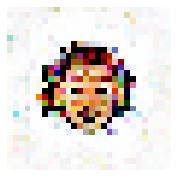

In [94]:
plt.figure(figsize=(10,10))
plt.imshow(generated_imgs[0],interpolation='nearest')
plt.axis('off')   
plt.show()